In [2]:
import pandas as pd
import os
import matplotlib
import seaborn as sns
import numpy as np

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from src.data.preprocessing import *
from src.data.load_data_ecommerce import *

In [3]:
os.listdir("../data/raw/ecommerce-dataset/")

['category_tree.csv',
 'events.csv',
 'item_properties_part1.csv',
 'item_properties_part2.csv']

In [4]:
events = load_events()

In [4]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
events.shape

(2756101, 5)

In [6]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [7]:
# events by type
events.event.value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

In data we have 1,4 milion unique users. Only 11,7 thousand users purchased something. 1,1 milion users have interaction only with one item. 
We have 235 thousand items. Only 12 thousand items was purchased. 

### users

In [8]:
# distribution of users by count of interactions
events.visitorid.value_counts().describe()

count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
Name: visitorid, dtype: float64

At least 50% of users has only 1 interaction

In [9]:
# unique converted users
events.visitorid[events['event'] == 'transaction' ].nunique()

11719

In [10]:
# How many users interacted with 1,2,..,10 unique products?
events.groupby(["visitorid"]).itemid.nunique().value_counts()[:10]

1     1119500
2      170551
3       54235
4       23659
5       12650
6        7400
7        4655
8        3198
9        2286
10       1660
Name: itemid, dtype: int64

In [11]:
# How many users interacted with 1,2,..,10 unique products?
# Cumulative, percentual
aux = events.groupby(["visitorid"]).itemid.nunique().value_counts()
(aux.cumsum() / aux.sum())[:10]

1     0.795337
2     0.916503
3     0.955033
4     0.971842
5     0.980829
6     0.986086
7     0.989393
8     0.991665
9     0.993289
10    0.994469
Name: itemid, dtype: float64

In [12]:
# What is the median of unique products interacted by user?
events.groupby(["visitorid"]).itemid.nunique().value_counts().median()

1.0

In [13]:
# What is the maximum of unique products interacted by user?
max(events.groupby(["visitorid"]).itemid.nunique())

3814

In [14]:
# Users with more than 500 unique product interactions
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500]

visitorid
38015       522
53842       528
76757       929
77390       604
79627      1257
85734      1050
138131      894
152963     1622
163561     1314
165052      525
173863      553
198270      537
229157      769
247235      958
286616     1230
310759     1003
316850      998
350566      893
371606     1399
389532      528
518659      716
527307      818
530559     2209
548772      506
638482     1133
645525      791
684514     1187
705542      531
737053      642
757355      747
765630      820
825321      609
836635     1029
861299     1100
892013     1738
895999     1641
994820      912
1126569     685
1150086    3814
1161163     943
1165148     620
1297062    1146
1327144     580
Name: itemid, dtype: int64

In [15]:
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500].index

Int64Index([  38015,   53842,   76757,   77390,   79627,   85734,  138131,
             152963,  163561,  165052,  173863,  198270,  229157,  247235,
             286616,  310759,  316850,  350566,  371606,  389532,  518659,
             527307,  530559,  548772,  638482,  645525,  684514,  705542,
             737053,  757355,  765630,  825321,  836635,  861299,  892013,
             895999,  994820, 1126569, 1150086, 1161163, 1165148, 1297062,
            1327144],
           dtype='int64', name='visitorid')

C:\Users\Patrik\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


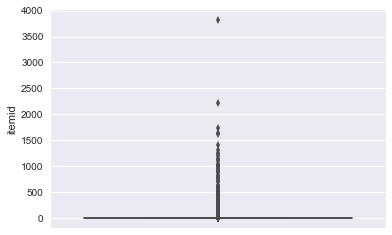

In [16]:
# boxplot of per user unique product interactions
sns.boxplot( y=events.groupby(["visitorid"]).itemid.nunique() )

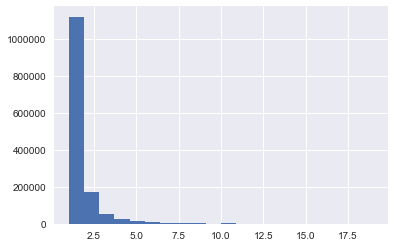

In [17]:
# clipped distribution of per user unique product interactions
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() <20].hist(bins=20)

### items

In [18]:
# distribution of items by count of interactions
events.itemid.value_counts().describe()

count    235061.000000
mean         11.725046
std          37.032101
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3412.000000
Name: itemid, dtype: float64

At least 25% of products has only 1 interaction

In [19]:
# unique items purchased
events.itemid[events['event'] == 'transaction' ].nunique()

12025

In [20]:
# How many products were interacted by 1,2,..,10 users?
events.groupby(["itemid"]).visitorid.nunique().value_counts()[:50].sort_index()

1     81347
2     36186
3     21178
4     14445
5     10497
6      8120
7      6336
8      5380
9      4520
10     3815
11     3245
12     2823
13     2536
14     2232
15     1920
16     1842
17     1666
18     1465
19     1382
20     1199
21     1116
22     1117
23      980
24      868
25      804
26      810
27      730
28      671
29      652
30      601
31      553
32      577
33      529
34      468
35      431
36      426
37      417
38      367
39      336
40      360
41      316
42      316
43      309
44      242
45      270
46      245
47      258
48      219
50      243
51      229
Name: visitorid, dtype: int64

In [21]:
# How many products were interacted by 1,2,..,50 users?
# Cumulative, percentual
aux = events.groupby(["itemid"]).visitorid.nunique().value_counts().sort_index()
(aux.cumsum() / aux.sum())[:50]

1     0.346068
2     0.500011
3     0.590106
4     0.651559
5     0.696215
6     0.730759
7     0.757714
8     0.780602
9     0.799831
10    0.816061
11    0.829865
12    0.841875
13    0.852664
14    0.862159
15    0.870327
16    0.878164
17    0.885251
18    0.891483
19    0.897363
20    0.902464
21    0.907211
22    0.911963
23    0.916132
24    0.919825
25    0.923245
26    0.926691
27    0.929797
28    0.932652
29    0.935425
30    0.937982
31    0.940335
32    0.942789
33    0.945040
34    0.947031
35    0.948864
36    0.950677
37    0.952451
38    0.954012
39    0.955441
40    0.956973
41    0.958317
42    0.959662
43    0.960976
44    0.962006
45    0.963154
46    0.964197
47    0.965294
48    0.966226
49    0.967119
50    0.968153
Name: visitorid, dtype: float64

In [22]:
# What is the median of unique users interacted per item?
events.groupby(["itemid"]).visitorid.nunique().value_counts().median()

4.0

In [23]:
# What is the maximum of unique users interacted per item?
max(events.groupby(["itemid"]).visitorid.nunique().value_counts())

81347

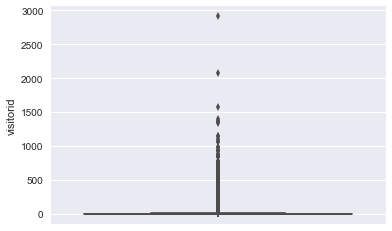

In [24]:
# boxplot of per item unique customer interactions
sns.boxplot( y=events.groupby(["itemid"]).visitorid.nunique() )

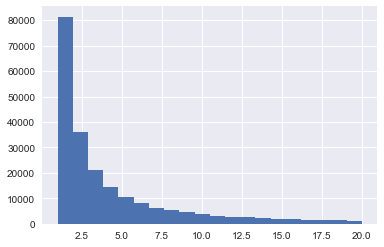

In [25]:
# clipped distribution of per item unique customer interactions
events.groupby(["itemid"]).visitorid.nunique()[events.groupby(["itemid"]).visitorid.nunique() <=20].hist(bins=20)

### Timestamp

In [26]:
events['datetime'] = pd.to_datetime(events['timestamp'],unit='ms')

Data are from range between 2015-05-03 and 2015-09-18

In [27]:
min(events['datetime'])

Timestamp('2015-05-03 03:00:04.384000')

In [28]:
max(events['datetime'])

Timestamp('2015-09-18 02:59:47.788000')

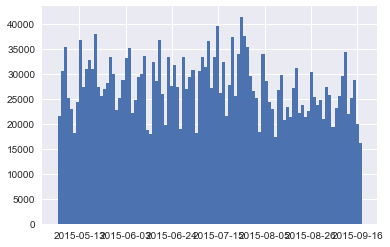

In [29]:
# events in time
events['datetime'].hist(bins=100)

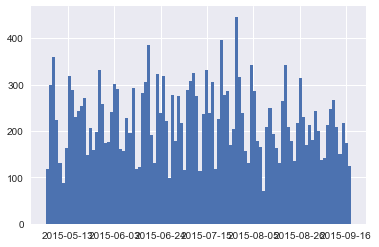

In [30]:
# purchases in time
events['datetime'][events['event'] == 'transaction' ].hist(bins=100)

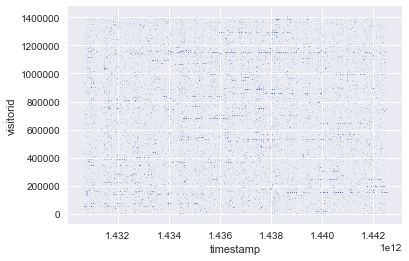

In [31]:
# purchases in time
events[events['event'] == 'transaction'].plot.scatter('timestamp','visitorid',s=0.01)

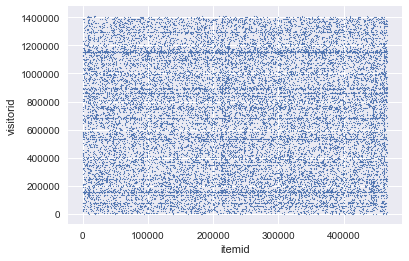

In [32]:
# purchases in time
events[events['event'] == 'transaction'].plot.scatter('itemid','visitorid',s=0.7)

# Data processing

During data processing, we excluded users with less than 5 products and more than 100 products

In [5]:
data_x,data_y = preprocessing(events,"visitorid","itemid")

In [6]:
train_x,test_x,train_y,test_y = data_split(data_x,data_y)

In [7]:
len(data_x)

26766

In [8]:
# users (=sequences) x sequence length
train_x.shape

(21412, 100)

In [9]:
# users (=sequences) x sequence length
test_x.shape

(5354, 100)

In [10]:
# output dim = one hot encoded resulting items
len(test_y[0])

74701